<a href="https://colab.research.google.com/github/chaobai/Cousera-DeepLearning.AI-TensorFlow-Developer/blob/master/C1%20-%20Introduction%20to%20TensorFlow/W4/Lab_1_image_generator_no_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:02<00:00, 70.6MB/s]


In [3]:
import os
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [4]:
train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse22-5.png', 'horse45-0.png', 'horse47-7.png', 'horse11-0.png', 'horse22-0.png', 'horse18-1.png', 'horse16-4.png', 'horse12-8.png', 'horse04-2.png', 'horse15-8.png']
['human08-01.png', 'human02-07.png', 'human09-29.png', 'human15-16.png', 'human03-15.png', 'human02-05.png', 'human12-29.png', 'human03-09.png', 'human17-26.png', 'human05-20.png']


In [6]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

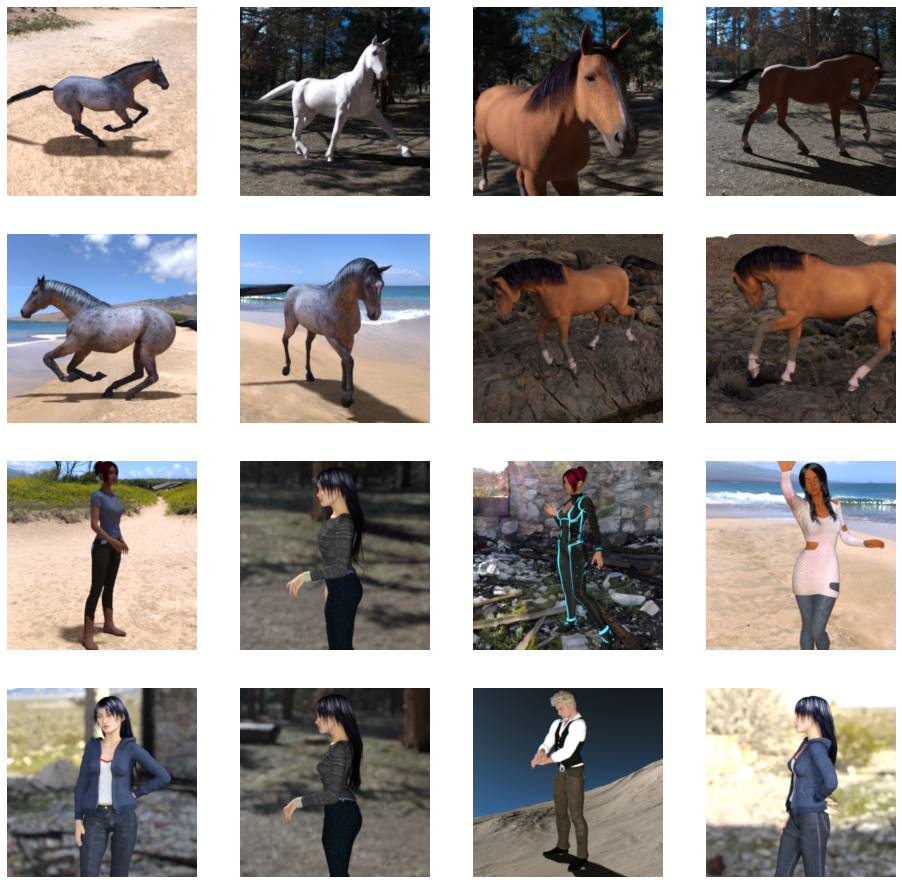

In [9]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [10]:
import tensorflow as tf

In [11]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             ])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [13]:
model.compile(loss=tf.losses.BinaryCrossentropy(),
              optimizer=tf.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [15]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [16]:
history = model.fit(train_generator, steps_per_epoch=8, epochs=15, verbose=1)

Epoch 1/15
8/8 [==============================] - 63s 7s/step - loss: 0.9493 - accuracy: 0.5139
Epoch 2/15
8/8 [==============================] - 57s 7s/step - loss: 0.6048 - accuracy: 0.7430
Epoch 3/15
8/8 [==============================] - 57s 7s/step - loss: 0.4674 - accuracy: 0.8042
Epoch 4/15
8/8 [==============================] - 57s 7s/step - loss: 0.2682 - accuracy: 0.8954
Epoch 5/15
8/8 [==============================] - 57s 7s/step - loss: 0.3539 - accuracy: 0.8576
Epoch 6/15
8/8 [==============================] - 57s 7s/step - loss: 0.5170 - accuracy: 0.8576
Epoch 7/15
8/8 [==============================] - 57s 7s/step - loss: 0.1432 - accuracy: 0.9377
Epoch 8/15
8/8 [==============================] - 57s 7s/step - loss: 0.1140 - accuracy: 0.9466
Epoch 9/15
8/8 [==============================] - 68s 8s/step - loss: 0.1286 - accuracy: 0.9570
Epoch 10/15
8/8 [==============================] - 57s 7s/step - loss: 0.2922 - accuracy: 0.8977
Epoch 11/15
8/8 [======================

In [20]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving gelding-bay-coat.jpg to gelding-bay-coat.jpg
[0.]
gelding-bay-coat.jpg is a horse


[array([[[[2.76427269e-01, 0.00000000e+00, 0.00000000e+00, ...,
          1.72792934e-02, 0.00000000e+00, 3.81072879e-01],
         [2.95133412e-01, 0.00000000e+00, 0.00000000e+00, ...,
          1.32257603e-02, 0.00000000e+00, 3.99229944e-01],
         [3.11568141e-01, 0.00000000e+00, 0.00000000e+00, ...,
          6.10541971e-03, 0.00000000e+00, 4.12166089e-01],
         ...,
         [3.44300359e-01, 0.00000000e+00, 0.00000000e+00, ...,
          5.79184387e-03, 0.00000000e+00, 4.32625204e-01],
         [3.51040125e-01, 0.00000000e+00, 0.00000000e+00, ...,
          2.91772280e-03, 0.00000000e+00, 4.36646342e-01],
         [3.49763989e-01, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 4.40143615e-01]],

        [[3.15321684e-01, 0.00000000e+00, 0.00000000e+00, ...,
          7.78007880e-03, 0.00000000e+00, 4.19798821e-01],
         [3.31338614e-01, 0.00000000e+00, 0.00000000e+00, ...,
          1.12905703e-03, 0.00000000e+00, 4.27378118e-01],
       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


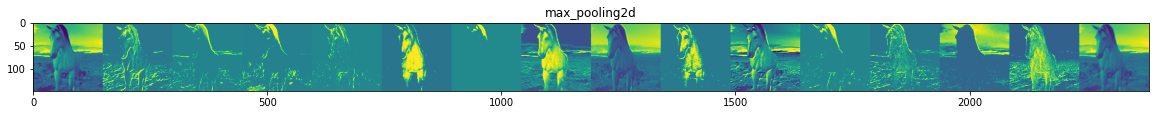

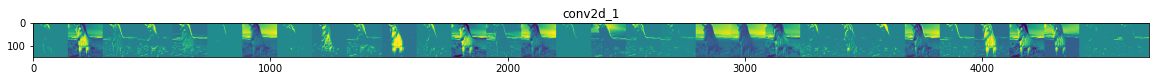

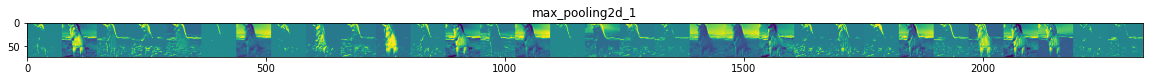

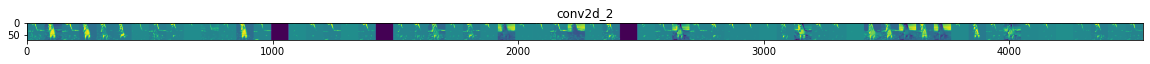

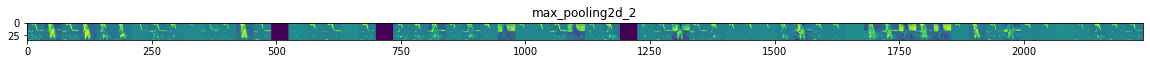

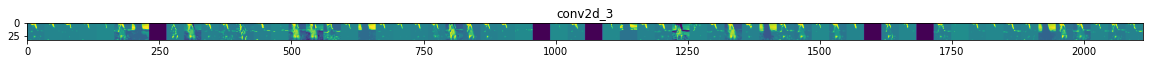

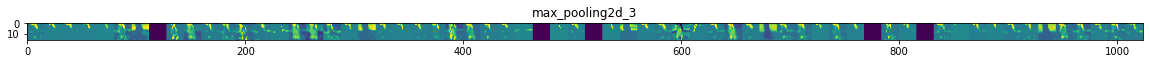

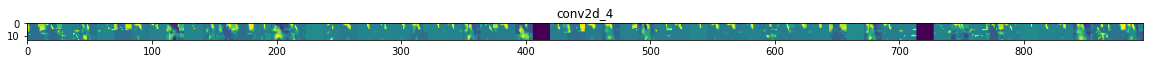

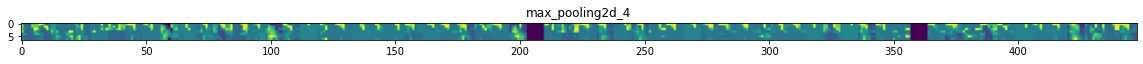

In [25]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files+human_img_files)

img = load_img(img_path, target_size=(300,300))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x /= 255

successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')



In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)